# 1a VERIFICAÇÃO DE APRENDIZAGEM

In [1]:
import unicodedata
import re
import pandas as pd
import numpy as np

In [2]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
    w = w.strip().lower()

    # creating a space between a word and the punctuation following it eg: "he is a boy." => "he is a boy ."
    # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping
    # -punctuation
    w = re.sub(r"([?.!,¿#@0-9])", r"", w)

    return w

### Seleção Dos Dados

No experimento realizado foi usado um conjunto de dados contento versículos extraídos da Bíblia em 27 versões diferentes cada uma em um idioma.
São 26 idiomas indígenas e uma versão em Português (versão internacional).
Além disso, apenas uma porção do conjunto de dados original foi utilizada. 
Isso ocorreu devido ao alto consumo de recurso computacional que inviabilizariam uma avaliação do método o proposto. 
Os algoritmos consomem um quantidade considerável de recurso computacional muitos dados impossibilitam a execução adequada dos experimentos.

In [7]:
!wget -O target_aligned_text.csv https://raw.githubusercontent.com/Tiagoblima/bracis-2021-language/main/target_aligned_text.csv?token=AH4TM4VEPPO74NYFEDTE3PTAUL2Y6

--2021-05-10 23:03:52--  https://raw.githubusercontent.com/Tiagoblima/bracis-2021-language/main/target_aligned_text.csv?token=AH4TM4VEPPO74NYFEDTE3PTAUL2Y6
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52305233 (50M) [text/plain]
Saving to: ‘target_aligned_text.csv’

target_aligned_text 100%[===================>]  49.88M  91.3MB/s    in 0.5s    

2021-05-10 23:03:53 (91.3 MB/s) - ‘target_aligned_text.csv’ saved [52305233/52305233]



In [ ]:
df = pd.read_csv('target_aligned_text.csv').dropna()


In [208]:
languages = "tukano,terena,urubu-kaapor,guarani,karaja,kayabi".split(',')

In [275]:

collection = []
for lang in df.columns[3:]:
  for text in df.loc[:, lang].to_numpy().squeeze():

    collection.append({
        'TEXT':text,
        'LANG':lang,
    })

samples = pd.DataFrame.from_dict(collection).sample(frac=0.01).to_csv('samples_lg.csv',
index=False, index_label=False)
samples = pd.read_csv('samples_lg.csv')
samples

,TEXT,LANG
0,Nhũm pre ã Jejus amnhĩ nê kãm kapẽr anẽ. Hãmri...,apinaye
1,"Ti noo gó kä mꞌ, baad Jesus Pꞌop Hagä Do Sahee...",nadeb
2,Odaa niɡ̶idiaaɡ̶idi ja imonyatibigiwaji migoti...,kadiweu
3,"Tawamhã ĩ'rata te tinhamra zahuré, siré saihu...",xavante
4,Koati ákotinehiko aunáti ra xâne yara káxehiko...,terena
...,...,...
1553,Ti mꞌ taky hado kän: —Baad nado né paawä pä ta...,nadeb
1554,"Nãm me ã abenmã anen kam Jejumã kum, —‍Kon ne....",kayapo
1555,Morarame mõpozakoxi toytose tahtao Rewi tonese...,apalai
1556,Deus ba hawa tohi zizukninaha iwaze Satanas zi...,rikbaktsa


In [260]:
s = samples[samples['LANG']=="portuguese"].sample(n=5)
s['TEXT'].to_numpy()

array(['pois em breve, muito em breve Aquele que vem virá, e não demorará.',
       'ao redor do qual estavam outros vinte e quatro tronos, e assentados neles havia vinte e quatro anciãos. Eles estavam vestidos de branco e tinham na cabeça coroas de ouro.',
       'Delas também falamos, não com palavras ensinadas pela sabedoria humana, mas com palavras ensinadas pelo Espírito, interpretando verdades espirituais para os que são espirituais. Quem não tem o Espírito não aceita as coisas que vêm do Espírito de Deus, pois lhe são loucura; e não é capaz de entendê-las, porque elas são discernidas espiritualmente. Mas quem é espiritual discerne todas as coisas, e ele mesmo por ninguém é discernido; pois',
       'No entanto, você tem aí em Sardes uns poucos que não contaminaram as suas vestes. Eles andarão comigo, vestidos de branco, pois são dignos.',
       'E se a sua mão direita o fizer pecar, corte-a e lance-a fora. É melhor perder uma parte do seu corpo do que ir todo ele para o inferno

In [239]:
s = s['TEXT'].apply(preprocess_sentence).to_numpy()
s

IndexError: ignored

### Carregando Corpus Selecionado

### PRÉ-PROCESSAMENTO

1. Ao menos um método de pré-processamento deve ser usado, gerando uma nova base de
dados.
2. O tipo de pré-processamento utilizado deve estar relacionado ao contexto da aplicação, de
acordo com a modelagem do problema indicada na resolução da Atividade 4 (ML-L04).
3. Remoção de vírgulas, espaços em branco, identificador dos padrões, etc. não serão
considerados pré-processamento válidos.

In [3]:
samples = pd.read_csv('datasets/samples.csv')
classes = set(samples["LANG"].tolist())

In [4]:
from collections import Counter
X = samples['TEXT'].apply(preprocess_sentence).to_numpy()
y = samples['LANG'].to_numpy()
N_CLUSTER = 15
metadata = pd.DataFrame.from_dict(Counter(y), orient='index')
metadata

,0
apalai,100
apinaye,100
apurina,100
bakairi,100
guajajara,100
guarani,100
kadiweu,100
kagwahiva,100
kaigang,100
kaiwa,100


#### Método

O pré-processamento transforma cada documento em um formato que posso ser utilizado no cluster. A primeira fase do processamento consiste em transforma cada cluster em um vetor com M-dimensões. 
Nesse vetor, cada elemento é o vetor que representa uma única palavra que também é um vetor.
Para fazer isso é possível utilizar o *Term Frequency and Inverse Term Frequency*.




#### TF-IDF Weighing

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


tfidf_word = TfidfVectorizer(analyzer='word', ngram_range=(2, 3))
X_word_transformed = tfidf_word.fit_transform(X)

tfidf_char = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
X_char_transformed = tfidf_char.fit_transform(X)
X_char_transformed.shape

(2700, 191941)

### Avaliação do Algoritmo

### Métricas 

#### Davies-Bouldin score

É uma métrica que avaliação da média de similaridade um cluster com outro mais similar. 
Ela considera as distâncias dentro de cada cluster e entre cada um dos clusteres. Valores menores indicam clusters melhores.



#### Silhouette Coefficient of all samples

Essa métrica considera a distância entre cada exemplo dentro de cada cluster e entre o cluster mais próximo. O melhor valor é 1, 0 significa a existência de overlaps e -1 significa o pior resultado possível. 

*Referências:* 

[1. A Cluster Separation Measure](https://ieeexplore.ieee.org/document/4766909)

[2. Silhouettes: A graphical aid to the interpretation and validation of 
cluster analysis](https://www.sciencedirect.com/science/article/pii/0377042787901257)

[3. A Dendrite Method for Cluster Analysis
](https://www.researchgate.net/publication/233096619_A_Dendrite_Method_for_Cluster_Analysis)

## K-Means 


*Referência:* [Opinion classification using Maximum Entropy and K-Means Clustering](https://ieeexplore.ieee.org/abstract/document/7910292?casa_token=QAbNYBdCmAoAAAAA:xA-elSpmLadbWey9C2yAhyHzH2FO4fRA9S1ys0Y49b16Fx00jcuhhXUx9bNaK_oAyyighNFuGA)



In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [8]:
kmeans = KMeans(n_clusters=N_CLUSTER, random_state=42).fit(X_word_transformed)
pred = kmeans.predict(X_word_transformed)


silhouette = silhouette_score(X_word_transformed.toarray(), pred)

davies_boul = davies_bouldin_score(X_word_transformed.toarray(), pred)

print("silhouette_score: ", silhouette)
print("davies_boul: ", davies_boul)

silhouette_score:  0.00558810495651595
davies_boul:  13.331918493629384


In [9]:
from tqdm import tqdm
silh_scores = []
db_scores = []
evaluation_data = []
test_range = list(range(2, 31))
for n_ in tqdm(test_range):
  kmeans_word = KMeans(n_clusters=n_, random_state=42).fit(X_word_transformed)
  kmeans_char = KMeans(n_clusters=n_, random_state=42).fit(X_char_transformed)
  silh_score = silhouette_score(X_word_transformed.toarray(), kmeans.labels_)
  davies_boul = davies_bouldin_score(X_word_transformed.toarray(), kmeans.labels_)

  silh_scores.append(silh_score)
  db_scores.append(davies_boul)

100%|██████████| 29/29 [29:36<00:00, 61.27s/it]


In [10]:
evaluation_data = pd.DataFrame({
    "n_clusters":test_range+test_range,
    "scores":silh_scores+db_scores,
    "metric": ["silhouette_score"]*len(test_range)+["davies_boul"]*len(test_range),
})
evaluation_data.sample(n=5)

,n_clusters,scores,metric
41,14,9.766893,davies_boul
13,15,0.005588,silhouette_score
17,19,0.005619,silhouette_score
8,10,0.002895,silhouette_score
46,19,9.850066,davies_boul


Text(0.5, 1.0, 'Evolução dos Modelos')

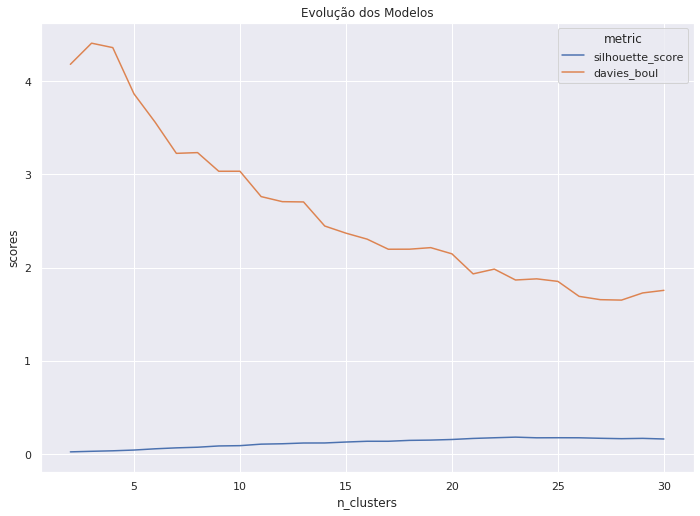

In [268]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.lineplot(x="n_clusters", y="scores", hue="metric", 
             data=evaluation_data)
g.set_title('Evolução dos Modelos')

### Análise Usando TSNE

Em análise preliminar, pode-se ver na figura a disposição dos idiomas em uma projeção 2D. 
Foi utilizado *t-distributed Stochastic Neighbor Embedding* (TSNE) para a redução da dimensionalidade e uma visualização dos dados.
Essa é uma forma bastante popular para visualização de dados em alta-dimensionalidade.
Nessa técnica os objetos são distribuídos de tal forma que pares semelhantes tem uma alta probabilidade na distribuição.
O modelo é treinado para minimizar a divergência em Kullback-Leibler *van2014accelerating*.
Após a redução da dimensionalidade das originais 18095 para apenas duas,  os dados foram postos em uma escala entre 0 e 1.

In [269]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
X_embedded = TSNE(n_components=2).fit_transform(X_transformed.toarray())
X_embedded.shape

(156, 2)

In [270]:
kmeans_2d = KMeans(n_clusters=N_CLUSTER, random_state=42).fit(X_embedded)
pred = kmeans_2d.predict(X_embedded)

cluster_c = kmeans_2d.cluster_centers_

silhouette = silhouette_score(X_embedded, kmeans.labels_)

davies_boul = davies_bouldin_score(X_embedded, kmeans.labels_)

print("silhouette_score: ", silhouette)
print("davies_boul: ", davies_boul)

clusters_ = pd.DataFrame(X_embedded, columns=['D1', 'D2'])
clusters_['knn_cluster'] = pred
clusters_['true_labels'] = y
clusters_.to_csv('clusters.csv')

silhouette_score:  0.5482367
davies_boul:  0.9307697893884602


In [229]:
to_label = lambda cluster_id: "cluster_"+str(cluster_id)

### Membros de cada Cluster

Aqui podemos visualizar quais idiomas estão em cada um dos clusters formados.

In [271]:
cluster_mem = {}
for cluster in range(len(classes)):
  members = clusters_.loc[clusters_['knn_cluster']==cluster, 'true_labels'].unique()
  cluster_mem[cluster] = members
df_cluster_mem = pd.DataFrame.from_dict(cluster_mem, orient='index')

df_cluster_mem.to_csv("clusters_members.csv")
df_cluster_mem

,0,1
0,kaiwa,guarani
1,rikbaktsa,None
2,terena,None
3,maxakali,None
4,urubu-kaapor,None
5,apurina,None
6,kaigang,None
7,parecis,None
8,kayapo,None
9,portuguese,None


### Majority Wins

Para obtermos um mapeamento, consideramos que a classe que mais aparece em cada cluster é a classe daquele cluster em específico.

In [272]:
prediction = {}
for cluster in clusters_['knn_cluster'].tolist():
  members = clusters_.loc[clusters_['knn_cluster']==cluster, 'true_labels'].tolist()
  prediction[cluster] = Counter(members).most_common(1)[0][0]
prediction = pd.DataFrame.from_dict(prediction, orient='index')
prediction.columns = ["predicted"]
prediction["center_d1"] = kmeans_2d.cluster_centers_[:,0]
prediction["center_d2"] = kmeans_2d.cluster_centers_[:,1]
prediction.to_csv("clusters_members.csv")
prediction

,predicted,center_d1,center_d2
6,kaigang,-3.479715,-8.598013
16,kayabi,-0.834091,3.134130
2,terena,6.667710,-10.556997
19,munduruku,12.704141,-1.028593
25,guajajara,-13.821892,-1.280366
13,tukano,-3.772603,1.382473
9,portuguese,9.739220,5.543198
12,karaja,3.286663,-3.050412
10,nadeb,-8.630351,-6.748085
4,urubu-kaapor,-11.008410,2.710675


### Visualização



### Cluster Centers

Dessa forma simples podemos visualizar aqui o centro de cada um dos clusters formados.

Language	Dialetecs	Family 

Tukano	-	Tukano

Terena	-	Aruaká

Urubu-Kaapór	-	Tupí-Guaraní 

Guaraní 	Mbyá,Kaiowá,Nhandéva	Tupí-Guaraní 

Karajá	Javaé, Karajá,Xambioá	Karajá

Kayabí	-	Tupí-Guaraní

Text(0.5, 1.0, 'Cluster Centers')

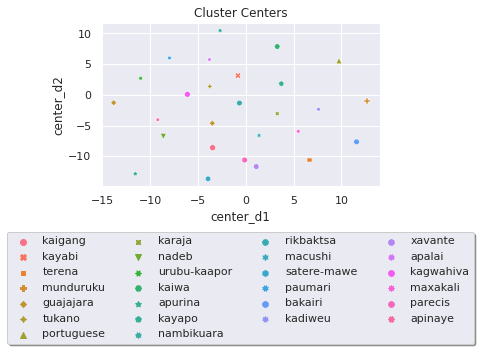

In [273]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(5.,3)})
g = sns.scatterplot(data=prediction, x="center_d1", y="center_d2", hue="predicted", 
style="predicted")
g.legend(loc='lower center', bbox_to_anchor=(0.5, -1), ncol=4, fancybox=True, shadow=True)
g.set_title('Cluster Centers')

In [203]:
mylist = list(range(1,10))
for i in mylist:
  mylist.remove(i)

Text(0.5, 1.0, 'Cluster Kmeans')

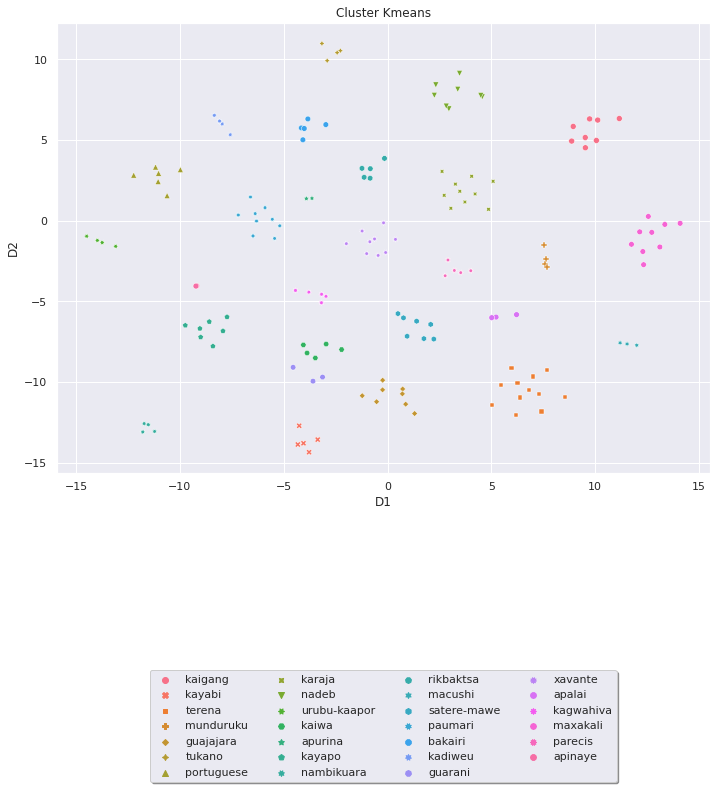

In [274]:
import seaborn as sns
clusters_['cluster_label'] = clusters_['knn_cluster'].apply(to_label)
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.scatterplot(data=clusters_, x="D1", y="D2", hue="true_labels", 
style="true_labels")
g.legend(loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=4, fancybox=True, shadow=True)
g.set_title('Cluster Kmeans')

In [ ]:
!mkdir snapshots/

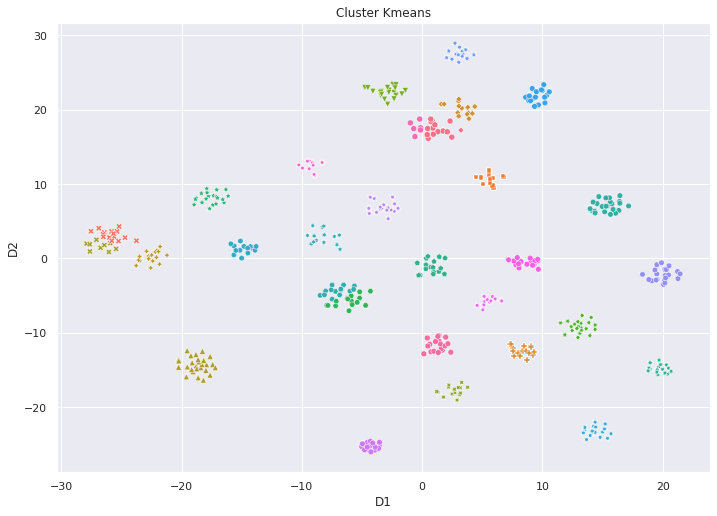

In [ ]:
import time 

fig = plt.figure()

silh_scores = []
db_scores = []
time_spend = []


for n_ in range(2, 31):
  start = time.time()

  kmeans = KMeans(n_clusters=n_, random_state=42).fit(X_embedded)
  time_spend.append((time.time()-start)/60)
  silh_score = silhouette_score(X_embedded, kmeans.labels_)
  davies_boul = davies_bouldin_score(X_embedded, kmeans.labels_)
  silh_scores.append(silh_score)
  db_scores.append(davies_boul)
  

  clus  = pd.DataFrame(X_embedded, columns=['D1', 'D2'])
  clus['knn_cluster'] = list(map(to_label, kmeans.predict(X_embedded)))
  clus['true_labels'] = y

  # Plota e salva o gráfico
  g = sns.scatterplot(data=clus, x="D1", y="D2", hue="knn_cluster", 
  style="true_labels")
  g.legend().remove()
  #g.legend(loc='lower center', bbox_to_anchor=(0.5, -0.9), ncol=4, fancybox=True, shadow=True)
  g.set_title('Cluster Kmeans')
  fig.savefig(f"snapshots/{n_}_snapshot.png")

In [ ]:
pd.DataFrame({
    "silh_scores":silh_scores,
    "db_scores":db_scores,
    "time_spend":time_spend
}).to_csv('snapshots.csv')

In [ ]:
get_seq = lambda file:int(file.split('_')[0])

data = zip(map(get_seq, os.listdir('snapshots')), os.listdir('snapshots'))
sorted_files = sorted_by_second = sorted(data, key=lambda tup: tup[0])

In [ ]:
import imageio
import os
images = []
for _, filename in sorted_files:
    print(filename)
    
    images.append(imageio.imread(os.path.join('snapshots', filename)))
imageio.mimsave('movie.gif', images, fps=0.09)

2_snapshot.png
3_snapshot.png
4_snapshot.png
5_snapshot.png
6_snapshot.png
7_snapshot.png
8_snapshot.png
9_snapshot.png
10_snapshot.png
11_snapshot.png
12_snapshot.png
13_snapshot.png
14_snapshot.png
15_snapshot.png
16_snapshot.png
17_snapshot.png
18_snapshot.png
19_snapshot.png
20_snapshot.png
21_snapshot.png
22_snapshot.png
23_snapshot.png
24_snapshot.png
25_snapshot.png
26_snapshot.png
27_snapshot.png
28_snapshot.png
29_snapshot.png
30_snapshot.png


In [ ]:
!zip -r snapshots.zip snapshots/

  adding: snapshots/ (stored 0%)
  adding: snapshots/9_snapshot.png (deflated 4%)
  adding: snapshots/11_snapshot.png (deflated 4%)
  adding: snapshots/8_snapshot.png (deflated 4%)
  adding: snapshots/15_snapshot.png (deflated 4%)
  adding: snapshots/2_snapshot.png (deflated 4%)
  adding: snapshots/5_snapshot.png (deflated 4%)
  adding: snapshots/3_snapshot.png (deflated 4%)
  adding: snapshots/6_snapshot.png (deflated 4%)
  adding: snapshots/13_snapshot.png (deflated 4%)
  adding: snapshots/24_snapshot.png (deflated 4%)
  adding: snapshots/10_snapshot.png (deflated 4%)
  adding: snapshots/16_snapshot.png (deflated 4%)
  adding: snapshots/14_snapshot.png (deflated 4%)
  adding: snapshots/12_snapshot.png (deflated 4%)
  adding: snapshots/30_snapshot.png (deflated 4%)
  adding: snapshots/4_snapshot.png (deflated 4%)
  adding: snapshots/20_snapshot.png (deflated 4%)
  adding: snapshots/22_snapshot.png (deflated 4%)
  adding: snapshots/17_snapshot.png (deflated 4%)
  adding: snapshots/26_s